In [1]:
from bentdna import shapefourier
import numpy as np
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
import matplotlib.pyplot as plt
workfolder = '/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis'

### Part 1: Histogram of $a_n$

In [2]:
h_agent = shapefourier.HistogramAn(workfolder)

/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/a_tract_21mer/an_folder exists
/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/atat_21mer/an_folder exists
/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/ctct_21mer/an_folder exists
/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/g_tract_21mer/an_folder exists
/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/gcgc_21mer/an_folder exists
/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/tgtg_21mer/an_folder exists


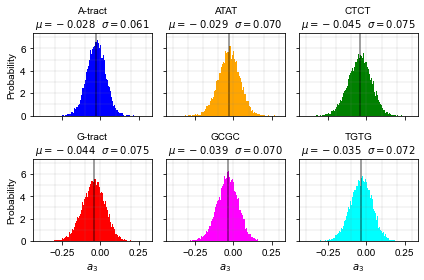

In [4]:
figsize = (6, 4)
fig, d_axes = h_agent.plot_main(figsize)
plt.tight_layout()
#plt.savefig('a3_histogram.svg')
plt.show()

### Part 2: All systems $L_p$ plot

/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/a_tract_21mer/an_folder exists
/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/atat_21mer/an_folder exists
/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/ctct_21mer/an_folder exists
/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/g_tract_21mer/an_folder exists
/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/gcgc_21mer/an_folder exists
/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/tgtg_21mer/an_folder exists


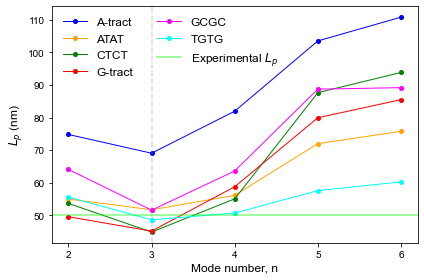

In [7]:
figsize = (6, 4)
agent = shapefourier.LpSixPlots(figsize)
agent.plot_main()
plt.tight_layout()
#plt.savefig('Lp_2_6.svg')
plt.show()

### Part 3: Lp Plots for A-tract Junction Model

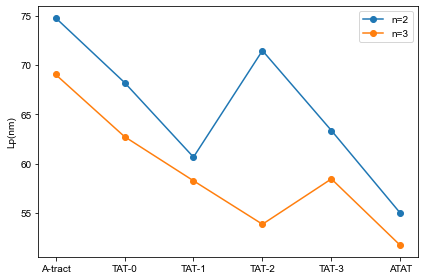

In [11]:
xlist = range(6)
n2list = [74.8, 68.23, 60.66, 71.47, 63.36, 54.97]
n3list = [69.05, 62.74, 58.26, 53.85, 58.45, 51.70]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

ax.plot(xlist, n2list, '-o', label='n=2')
ax.plot(xlist, n3list, '-o', label='n=3')
ax.set_xticks(xlist)
ax.set_xticklabels(['A-tract', 'TAT-0', 'TAT-1', 'TAT-2', 'TAT-3', 'ATAT'])
ax.set_ylabel('Lp(nm)')
ax.legend()

plt.tight_layout()
#plt.savefig('a_junction_lp.svg')
plt.show()

### Part 2: All systems plot

/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/a_tract_21mer/an_folder exists
/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/atat_21mer/an_folder exists
/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/ctct_21mer/an_folder exists
/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/g_tract_21mer/an_folder exists
/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/gcgc_21mer/an_folder exists
/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/tgtg_21mer/an_folder exists


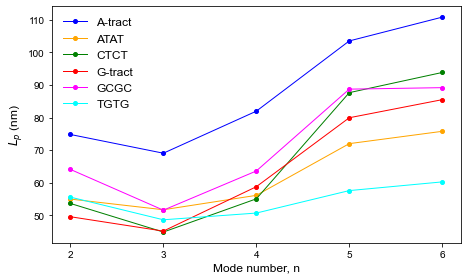

In [4]:
figsize = (6.6, 4)
agent = shapefourier.LpSixPlots(figsize)
agent.plot_main()
plt.tight_layout()
#plt.savefig('Lp_2_6.svg')
plt.show()

### Additional Part 1: Read df_an

In [5]:
n_begin = 0
n_end = 9
host = 'a_tract_21mer'
s_agent = shapefourier.ShapeAgent(workfolder, host)
df_an = s_agent.read_df_an(n_begin, n_end)

/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/a_tract_21mer/an_folder exists


In [6]:
df_an

,0,1,2,3,4,5,6,7,8,9
0,0.472659,-0.082037,-0.083300,-0.060492,-0.014238,0.032104,0.011171,0.012139,-0.010040,-0.012814
1,0.372355,-0.112163,0.070121,0.000105,0.009575,-0.049337,-0.007295,-0.019887,0.004396,-0.003486
2,0.562723,-0.116956,0.093044,-0.038627,-0.073007,-0.068122,0.020503,-0.021716,-0.007891,0.001465
3,0.428166,-0.167618,0.008348,0.021849,0.051480,-0.028985,-0.002691,-0.012772,-0.000884,-0.002050
4,0.471383,-0.037604,0.005544,-0.060761,0.010258,-0.017149,0.031898,-0.010619,-0.001598,0.004935
...,...,...,...,...,...,...,...,...,...,...
9995,1.148501,-0.370724,-0.067492,0.014788,-0.073115,0.045811,-0.053496,0.046606,0.018932,0.035492
9996,0.708673,-0.229659,-0.062182,0.036788,0.039400,0.021337,0.006266,0.002501,0.005926,-0.009636
9997,0.666566,-0.191627,-0.069825,-0.033473,0.051324,0.012235,-0.024481,0.025213,-0.013616,0.011344
9998,0.864138,-0.119445,-0.166080,-0.030267,0.004825,0.026140,0.002688,0.011808,0.011989,-0.001841


In [ ]:
def get_nlist_Lplist(df, L, n_begin, n_end):
    n_list = list(range(n_begin, n_end+1))
    Lp_list = list()
    for n in n_list:
        var_an = df[str(n)].var()
        Lp = np.square(L) / (np.square(n) * np.square(np.pi) * var_an)
        Lp_list.append(Lp)
    return n_list, Lp_list

def print_lp(host, nlist, Lplist, sele_nlist):
    print_list = [f'{host}:']
    for n, Lp in zip(nlist, Lplist):
        if n in sele_nlist:
            print_list.append(f'(n={n}, Lp={Lp:.2f})')
    print(' '.join(print_list))

In [ ]:
n_begin = 0
n_end = 9
sele_nlist = [2, 3]

In [ ]:
xlist = range(6)
n2list = [74.8, 68.23, 60.66, 71.47, 63.36, 54.97]
n3list = [69.05, 62.74, 58.26, 53.85, 58.45, 51.70]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

ax.plot(xlist, n2list, '-o', label='n=2')
ax.plot(xlist, n3list, '-o', label='n=3')
ax.set_xticks(xlist)
ax.set_xticklabels(['A-tract', 'TAT-0', 'TAT-1', 'TAT-2', 'TAT-3', 'ATAT'])
ax.set_ylabel('Lp(nm)')
ax.legend()

plt.tight_layout()
#plt.savefig('a_junction_lp.svg')
plt.show()